In [1]:
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb
import pyfiglet

In [2]:
repos

['square/okhttp']

                                   __    _    _     _   _         
 ___  __ _ _   _  __ _ _ __ ___   / /__ | | _| |__ | |_| |_ _ __  
/ __|/ _` | | | |/ _` | '__/ _ \ / / _ \| |/ / '_ \| __| __| '_ \ 
\__ \ (_| | |_| | (_| | | |  __// / (_) |   <| | | | |_| |_| |_) |
|___/\__, |\__,_|\__,_|_|  \___/_/ \___/|_|\_\_| |_|\__|\__| .__/ 
        |_|                                                |_|    

updating square/okhttp...
Repo is up to date!
Using precalculated evolutionary values

Results from the evolutionary view:

WeightGraph statistics: 1858 nodes, 40900 edges, 20 connected component(s), with sizes: [1832, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 3, 1, 1, 1, 1]
Edge weights: [2, 2, 2, 2, 2] ... [368, 372, 380, 412, 508] , mean: 7.881075794621027


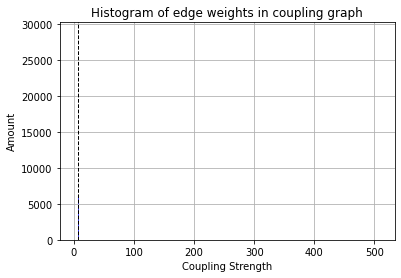

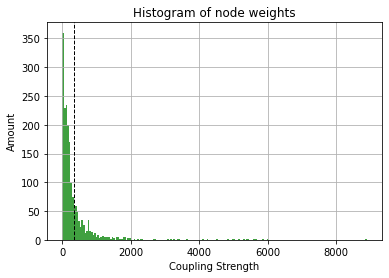




Program is over!


In [3]:
views = ["evolutionary"] # ["structural", "evolutionary", "linguistic"]

for repo in repos:
    r = LocalRepo(repo)
    print(pyfiglet.figlet_format(r.name))
    r.update()
    
    # tree = RepoTree.init_from_repo(r)
    
    for view in views:
        # MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        coupling_graph.show_weight_histogram()
        # coupling_graph.visualize()
        print("\n")
    
    
print("\nProgram is over!")